# Convergence des polynômes du chaos pour la loi lognormale


On cherche à reproduire la situation présentée dans la section 4.1. "Periodic functions of a lognormal random variable" de [1]. 

Soit $\xi\sim N(0,1)$ une variable aléatoire gaussienne standard. On considère la variable lognormale $\eta = e^\xi$. Soit $f_\eta$ la densité de probabilité de la variable lognormale $\eta$. Soit $g:\mathbb{R}\rightarrow \mathbb{R}$ mesurable, impaire et 1-périodique, c'est à dire telle que $g(y+1)=g(y)$ et telle que $\langle g(\log(\eta))^2\rangle<\infty$. 

Alors, 

$$
\langle\eta^k g(\log(\eta))\rangle = \int_0\infty x^k f_\eta(x) g(\log(x)) dx = 0
$$

pour tout $k>0$.

En d'autres termes, les moments d'ordre 1 et plus de $g(\log(\eta))$ sont nuls. En conséquence, les coefficients du développement en polynôme du chaos de $Y=g(\log(\eta))=g(\xi)$ sont nuls. Cela implique que le développement en chaos polynomial de $Y$ est nul, ce qui ne correspond pas à la variable $Y$ à décomposer.

Pour créer un exemple concret de fonction $g$, nous procédons de la manière suivante. 
Soit $f_p$ une fonction 1-périodique. 
On considère la fonction $g$ définie par :

$$
g(x) = \frac{f_p(x) - f_p(-x)}{2}
$$

pour tout $x\in\mathbb{R}$. 

Alors la fonction $g$ est impaire, puisque :

$$
g(-x) = \frac{f_p(-x) - f_p(x)}{2} = - \frac{f_p(x) - f_p(-x)}{2} = -g(x)
$$

pour tout $x\in\mathbb{R}$. 

Conclusion : les coefficients ne sont pas très bien estimés, ce qui ne permet pas de valider facilement la théorie. A approfondir avec la fonction $f(x)=\sin(2\pi x)$ :

"Specifically, the nonzero function g(x) = sin(2πx), a popular example for non-determinacy cf. [36,40], satisfies
the requirements of Proposition 4.1."

Plus de détails sur les polynômes du chaos sont donnés dans (4], chapitre 11 "Wiener-Hermite polynomial chaos", page 234. Plus de détails sur la convergence spectrale de la décomposition en polynômes de Legendre sont donnés dans [4], Théorème 8.23, "Spectral convergence of Legendre expansions", page 152, dans le chapitre 8 "Orthogonal polynomials". 

**Reference**

[1] "On the convergence of the generalized polynomial chaos expansions.". Oliver G. Ernst, Antje Mugler, Hans-Jörg Starkloff and Elisabeth Ullmann. ESAIM: M2AN 46 (2012) 317–339

[2] A.N. Shiryaev, Probability. Springer-Verlag, New York (1996).

[3] J.M. Stoyanov, Counterexamples in Probability, 2nd edition. John Wiley & Sons Ltd., Chichester, UK (1997).

[4] Introduction to Uncertainty Quantification. T.J. Sullivan. Springer. 

In [1]:
import openturns as ot
import openturns.viewer as otv
import numpy as np
import matplotlib.pylab as plt

La fonction suivante calcule un chaos creux par moindres carrés avec une règle d'énumération linéaire associée à un degré total. 

In [2]:
def ComputeSparseLeastSquaresChaos(inputTrain, outputTrain, \
                                   multivariateBasis, totalDegree, \
                                   myDistribution):
    '''
    Crée un polynôme du chaos creux par moindres carrés. 
    
    Paramètres :
        inputTrain : ot.Sample
            Le plan d'expériences des entrées
        outputTrain : ot.Sample
            Le plan d'expériences des sorties
        multivariateBasis : ot.Basis
            La base multivariée du chaos
        totalDegree : int
            Le degré total maximal du chaos
        myDistribution : ot.Distribution
            La loi du vecteur aléatoire en entrée
    
    Description :    
        * Utilise la règle d'énumération contenue dans multivariateBasis. 
        * Utilise LeastSquaresStrategy pour calculer les 
        coefficients par moindres carrés. 
        * Utilise LeastSquaresMetaModelSelectionFactory pour 
        obtenir la méthode de sélection de modèle LARS. 
        * Utilise FixedStrategy pour conserver tous les coefficients 
        que la méthode LARS a préalablement sélectionné. 
    '''
    selectionAlgorithm = ot.LeastSquaresMetaModelSelectionFactory()
    projectionStrategy = ot.LeastSquaresStrategy(inputTrain, outputTrain, \
                                                 selectionAlgorithm)
    enumfunc = multivariateBasis.getEnumerateFunction()
    P = enumfunc.getStrataCumulatedCardinal(totalDegree)
    adaptiveStrategy = ot.FixedStrategy(multivariateBasis, P)
    chaosalgo = ot.FunctionalChaosAlgorithm(inputTrain, outputTrain, \
                                            myDistribution, adaptiveStrategy, \
                                            projectionStrategy)
    chaosalgo.run()
    result = chaosalgo.getResult()
    return result

In [3]:
def ComputeLeastSquaresChaos(inputTrain, outputTrain, \
                                   multivariateBasis, totalDegree, \
                                   myDistribution):
    '''
    Crée un polynôme du chaos (plein) par moindres carrés ordinaires. 
    
    Paramètres :
        inputTrain : ot.Sample
            Le plan d'expériences des entrées
        outputTrain : ot.Sample
            Le plan d'expériences des sorties
        multivariateBasis : ot.Basis
            La base multivariée du chaos
        totalDegree : int
            Le degré total maximal du chaos
        myDistribution : ot.Distribution
            La loi du vecteur aléatoire en entrée
    
    Description :    
        * Utilise la règle d'énumération contenue dans multivariateBasis. 
        * Utilise LeastSquaresStrategy pour calculer les 
        coefficients par moindres carrés. 
        * Utilise FixedStrategy pour conserver tous les coefficients. 
    '''
    projectionStrategy = ot.LeastSquaresStrategy(inputTrain, outputTrain)
    enumfunc = multivariateBasis.getEnumerateFunction()
    P = enumfunc.getStrataCumulatedCardinal(totalDegree)
    adaptiveStrategy = ot.FixedStrategy(multivariateBasis, P)
    chaosalgo = ot.FunctionalChaosAlgorithm(inputTrain, outputTrain, \
                                            myDistribution, adaptiveStrategy, \
                                            projectionStrategy)
    chaosalgo.run()
    result = chaosalgo.getResult()
    return result

In [4]:
def ComputeIntegrationChaos(maximumMarginalDegree, \
                            multivariateBasis, totalDegree, \
                            myDistribution):
    '''
    Crée un polynôme du chaos (plein) par intégration. 

    * Utilise la règle d'énumération contenue dans multivariateBasis. 
    * Utilise LeastSquaresStrategy pour calculer les 
    coefficients par moindres carrés. 
    * Utilise FixedStrategy pour conserver tous les coefficients. 

    Parameters
    ----------
    maximumMarginalDegree : int
        Le plan degré marginal de la 
        quadrature de Gauss tensorisée.
    multivariateBasis : ot.Basis
        La base multivariée du chaos
    totalDegree : int
        Le degré total maximal du chaos
    myDistribution : ot.Distribution
        La loi du vecteur aléatoire en entrée
    '''
    enumfunc = multivariateBasis.getEnumerateFunction()
    P = enumfunc.getStrataCumulatedCardinal(totalDegree)
    adaptiveStrategy = ot.FixedStrategy(multivariateBasis, P)
    distributionMu = multivariateBasis.getMeasure()
    dimension_input = distributionMu.getDimension()
    marginalDegrees = [maximumMarginalDegree] * dimension_input
    experiment = ot.GaussProductExperiment(distributionMu, marginalDegrees)
    sampleSize = experiment.generate().getSize()
    print("Number of function evaluations=", sampleSize)
    projectionStrategy = ot.IntegrationStrategy(experiment)
    chaosalgo = ot.FunctionalChaosAlgorithm(g, myDistribution, adaptiveStrategy, \
                                            projectionStrategy)
    chaosalgo.run()
    result = chaosalgo.getResult()
    return result

La fonction suivante calcule et affiche le Q2 et produit le diagramme de validation.

In [5]:
def printQ2Chaos(multivariateBasis, chaosResult, inputTest, outputTest, totalDegree):
    metamodel = chaosResult.getMetaModel() # get the metamodel
    val = ot.MetaModelValidation(inputTest, outputTest, metamodel)
    Q2 = val.computePredictivityFactor()
    Q2 = max(Q2, 0.0)
    graph = val.drawValidation()
    legend1 = "D=%d, Q2=%.2f%%" % (totalDegree, 100*Q2)
    graph.setLegends(["", legend1])
    print("Degree=%d, Q2=%.2f%%" % (
        totalDegree, 100*Q2))
    return graph

La fonction suivante calcule le degré de creux d'un polynôme du chaos en faisant l'hypothèse d'une règle d'énumération linéaire et d'une stratégie de troncature fixe associée un degré maximal donné. Le degré de creux est le ratio entre le nombre de coefficients retenus par la méthode de sélection de modèle et le nombre de coefficients total dans la base polynomiale pleine.

In [6]:
def computeQ2Chaos(chaosResult, inputTest, outputTest):
    '''Compute the Q2 of a chaos'''
    metamodel = chaosResult.getMetaModel()
    val = ot.MetaModelValidation(inputTest, outputTest, metamodel)
    Q2 = val.computePredictivityFactor()
    Q2 = max(Q2, 0.0)
    return Q2

In [7]:
def printCoefficientsTable(enumerateFunction, polynomialChaosResult):
    """
    Print the coefficients of the polynomial chaos.
    
    Parameters
    ----------
    enumerateFunction : ot.EnumerateFunction
    polynomialChaosResult : ot.PolynomialChaosResult
    """
    coefficients = polynomialChaosResult.getCoefficients()
    indices = polynomialChaosResult.getIndices()
    nbcoeffs = indices.getSize()
    print("# Indice, Multi-indice, Degree : Value")
    for k in range(nbcoeffs):
        multiindex = enumerateFunction(indices[k])
        degree = sum(multiindex)
        c = coefficients[k][0]
        print("#%d, %s (%s) : %s" % (k,multiindex,degree,c))
    return

In [8]:
def ComputePredictivityCoefficient(trainingSampleSize, validationSampleSize, maximumDegree):
    inputTrain = distribution.getSample(trainingSampleSize)
    outputTrain = python_model(inputTrain)
    inputTest = distribution.getSample(validationSampleSize)
    outputTest = python_model(inputTest)
    predictivity = ot.Sample(maximumDegree, 2)
    for totalDegree in range(1, maximumDegree):
        chaosResult = ComputeSparseLeastSquaresChaos(inputTrain, 
                                                     outputTrain,
                                                     multivariateBasis,
                                                     totalDegree,
                                                     distribution)
        metamodel = chaosResult.getMetaModel() # get the metamodel
        val = ot.MetaModelValidation(inputTest, outputTest, metamodel)
        Q2 = val.computePredictivityFactor()
        Q2 = max(Q2, 0.0)
        predictivity[totalDegree, 0] = totalDegree
        predictivity[totalDegree, 1] = Q2
    return predictivity

## Cas 1

In [9]:
dist_X = ot.LogNormal()
distribution = ot.ComposedDistribution([dist_X])

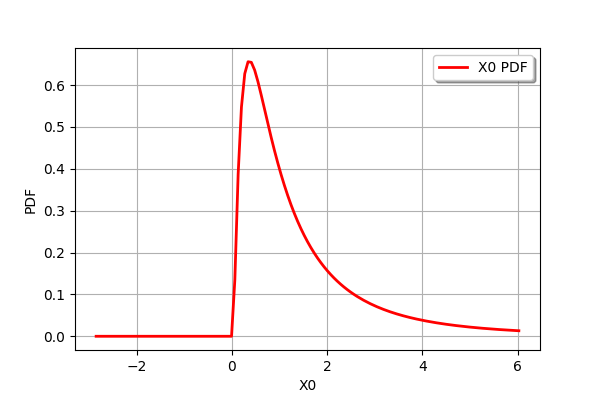

In [10]:
dist_X.drawPDF()

In [11]:
def one_periodic_function(x):
    t = np.mod(x, 1.0)
    return t

In [12]:
def odd_function(x):
    y1 = one_periodic_function(x[0])
    y2 = one_periodic_function(-x[0])
    y = (y1 - y2) / 2.0
    return [y]

In [13]:
g = ot.PythonFunction(1, 1, odd_function)

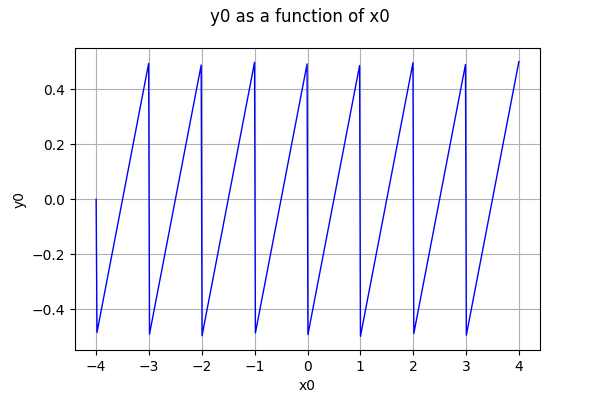

In [14]:
g.draw(-4.0, 4.0, 500)

In [15]:
def model(X):
    t = X[0]
    log = np.log(t)
    Y = g([log])
    return Y

In [16]:
python_model = ot.PythonFunction(1, 1, model)

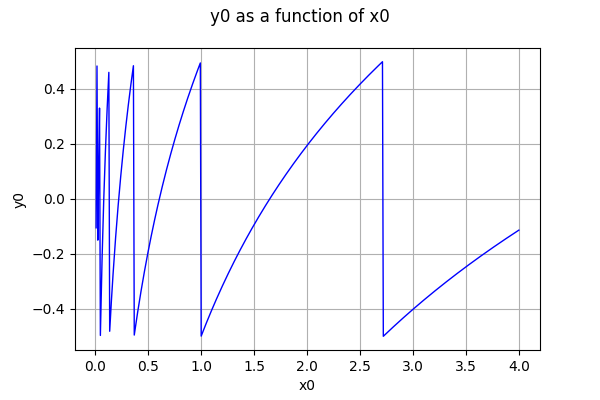

In [17]:
python_model.draw(0.01, 4.0, 500)

In [18]:
multivariateBasis = ot.OrthogonalProductPolynomialFactory([dist_X])
trainingSampleSize = 1000 # size of the train design
validationSampleSize = 1000 # size of the test design

In [19]:
totalDegree = 20
inputTrain = distribution.getSample(trainingSampleSize)
outputTrain = python_model(inputTrain)
inputTest = distribution.getSample(validationSampleSize)
outputTest = python_model(inputTest)
polynomialChaosResult = ComputeLeastSquaresChaos(inputTrain, 
                                             outputTrain,
                                             multivariateBasis,
                                             totalDegree,
                                             distribution)
enumerateFunction = multivariateBasis.getEnumerateFunction()
printCoefficientsTable(enumerateFunction, polynomialChaosResult)

# Indice, Multi-indice, Degree : Value
#0, [0] (0) : 54.0224111617572
#1, [1] (1) : 3013.013234772596
#2, [2] (2) : 19049.842088475416
#3, [3] (3) : 2473.7400508994897
#4, [4] (4) : -8093.412565922676
#5, [5] (5) : 12165.75131937787
#6, [6] (6) : -12886.279186106229
#7, [7] (7) : 9823.271286651807
#8, [8] (8) : -3616.7076644748854
#9, [9] (9) : -4058.202528936159
#10, [10] (10) : 10808.909110086834
#11, [11] (11) : -14141.835156832032
#12, [12] (12) : 12297.403508728425
#13, [13] (13) : -5134.149189641281
#14, [14] (14) : -5211.587540430661
#15, [15] (15) : 14272.30388543714
#16, [16] (16) : -16288.149173989295
#17, [17] (17) : 6912.977309486676
#18, [18] (18) : 11773.61902955431
#19, [19] (19) : -23282.251186493177
#20, [20] (20) : -14889.272277212545


In [20]:
totalDegree = 20
maximumMarginalDegree = 11
polynomialChaosResult = ComputeIntegrationChaos(maximumMarginalDegree, 
                                                multivariateBasis, 
                                                totalDegree, 
                                                distribution)
enumerateFunction = multivariateBasis.getEnumerateFunction()
printCoefficientsTable(enumerateFunction, polynomialChaosResult)

Number of function evaluations= 11
# Indice, Multi-indice, Degree : Value
#0, [0] (0) : 0.38859679521608487
#1, [1] (1) : -0.12413613721387175
#2, [2] (2) : 0.05540130088367285
#3, [3] (3) : -0.029077395679910592
#4, [4] (4) : 0.022825137408675207
#5, [5] (5) : -0.020244702108788315
#6, [6] (6) : 0.017174102331950675
#7, [7] (7) : -0.013920360187566287
#8, [8] (8) : 0.010543048832197328
#9, [9] (9) : -0.007076440232611659
#10, [10] (10) : 0.0035521438200455716
#11, [11] (11) : -2.158251095869906e-16
#12, [12] (12) : -0.0035530734863249585
#13, [13] (13) : 0.007080415072585987
#14, [14] (14) : -0.01055315711088504
#15, [15] (15) : 0.013942354975148015
#16, [16] (16) : -0.01722206590729826
#17, [17] (17) : 0.020372190383667183
#18, [18] (18) : -0.023375904941590052
#19, [19] (19) : 0.026215743053425215
#20, [20] (20) : -0.028873562578154575


Degree=1, Q2=0.00%
Degree=2, Q2=0.00%
Degree=3, Q2=0.00%
Degree=4, Q2=0.00%
Degree=5, Q2=0.00%
Degree=6, Q2=0.00%
Degree=7, Q2=0.00%
Degree=8, Q2=0.00%
Degree=9, Q2=0.00%


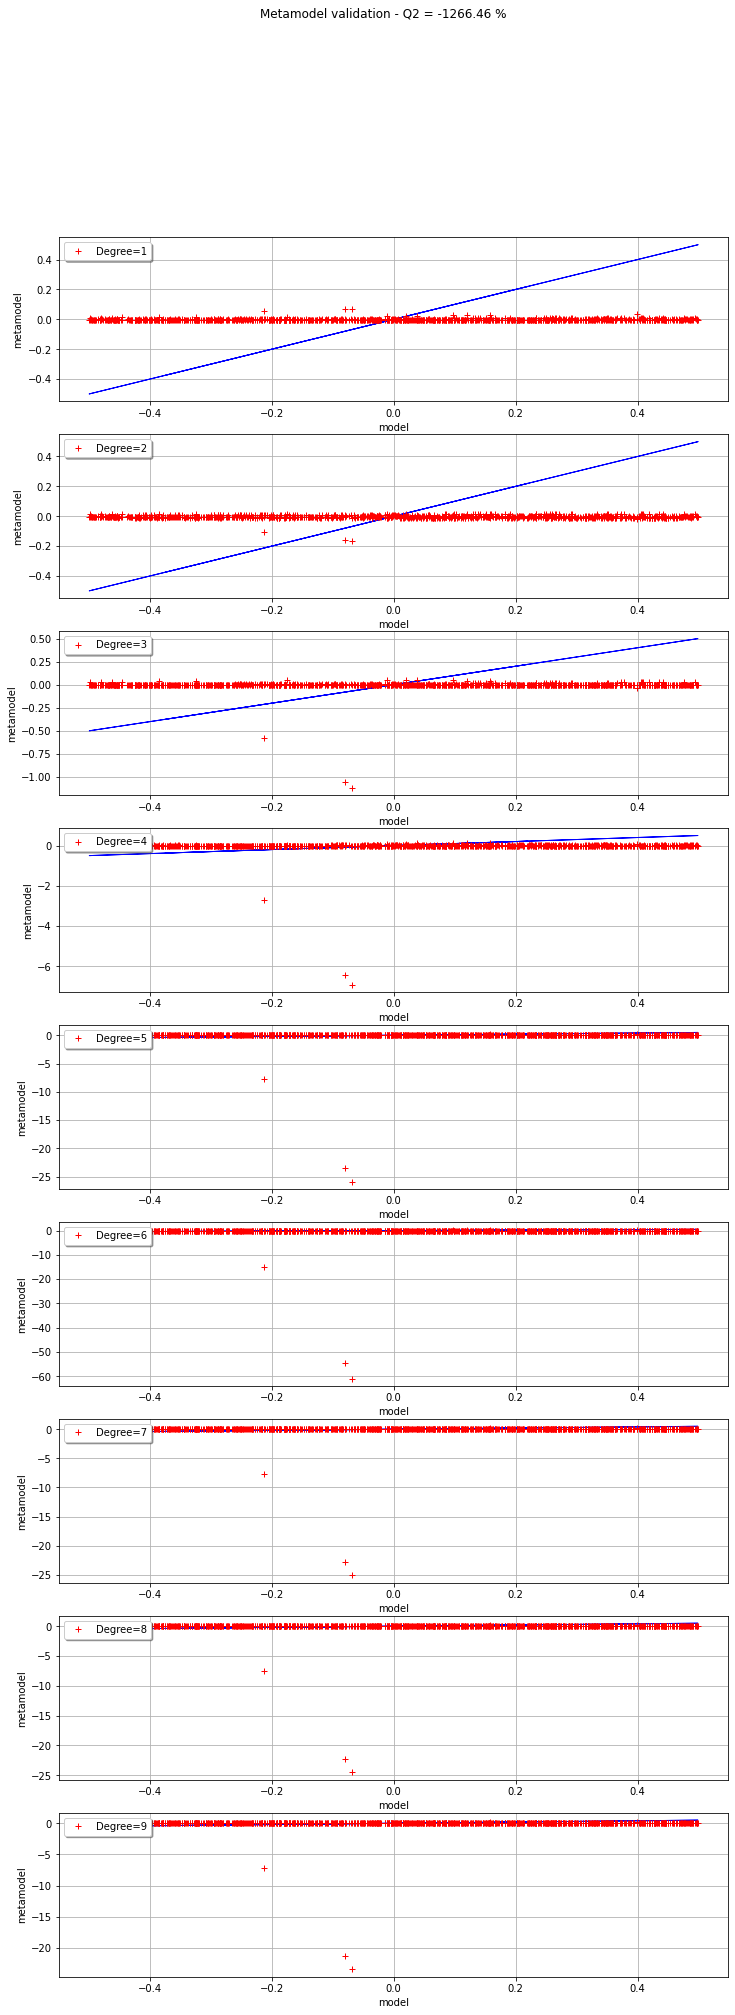

In [21]:
maximumDegree = 10
inputTrain = distribution.getSample(trainingSampleSize)
outputTrain = python_model(inputTrain)
inputTest = distribution.getSample(validationSampleSize)
outputTest = python_model(inputTest)
fig = plt.figure(figsize=(12, 32))
for totalDegree in range(1, maximumDegree):
    chaosResult = ComputeLeastSquaresChaos(inputTrain, 
                                                 outputTrain,
                                                 multivariateBasis,
                                                 totalDegree,
                                                 distribution)
    graph = printQ2Chaos(multivariateBasis,
                         chaosResult,
                         inputTest,
                         outputTest,
                         totalDegree)
    graph.setLegends(["", "Degree=%d" % (totalDegree)])
    graph.setLegendPosition("topleft")
    ax = fig.add_subplot(maximumDegree - 1, 1, totalDegree)
    _ = ot.viewer.View(graph, figure=fig, axes=[ax])

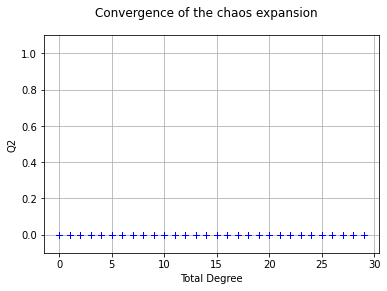

In [22]:
maximumDegree = 30
numberOfTrials = 5

graph = ot.Graph("Convergence of the chaos expansion", "Total Degree", "Q2", True)
for trialIndice in range(numberOfTrials):
    predictivity = ComputePredictivityCoefficient(trainingSampleSize, 
                                                  validationSampleSize,
                                                  maximumDegree)
    cloud = ot.Cloud(predictivity)
    graph.add(cloud)
view = otv.View(graph)
figure = view.getFigure()
_ = plt.ylim(bottom = -0.1, top = 1.1)